In [1]:
from __future__ import division
from utils import *
from functions import *
from numba import autojit
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)

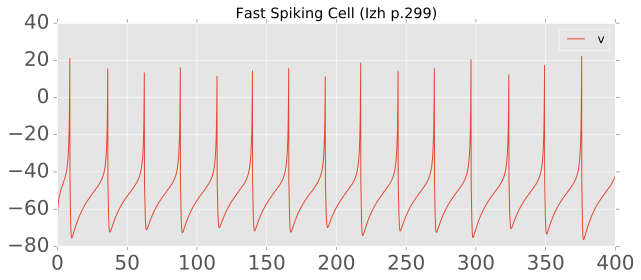

In [9]:
T = 400
dt = 0.1
t = np.arange(0,T,dt)

v = -65
u = 0
I = 100
res_v = []
res_u = []
for i in t:
    v += dt/20 * ( (v+55)*(v+40) - u + I)
    u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
    if v>25: 
        v = -45
    res_v.append(v)
    res_u.append(u)
        
plt.plot(t, res_v, label='v')
plt.title('Fast Spiking Cell (Izh p.299)')
# plt.plot(t, res_u, label = 'u')
plt.legend()

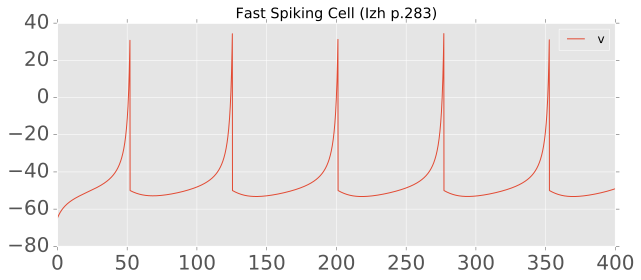

In [10]:
T = 400
dt = 0.1
t = np.arange(0,T,dt)

v = -65
u = 0
I = 100
res_v = []
res_u = []
for i in t:
    v += dt/100 * (0.7* (v+60)*(v+40) - u + I)
    u += dt * 0.03 * ( -2 * (v +60) - u)
    if v>35: 
        v = -50
        u += 100
    res_v.append(v)
    res_u.append(u)
        
plt.plot(t, res_v, label='v')
plt.title('Fast Spiking Cell (Izh p.283)')

# plt.plot(t, res_u, label = 'u')
plt.legend()

10000000 loops, best of 3: 26.2 ns per loop
